In [ ]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("../data/loan_data.csv")

In [4]:
df.head()

,loan_id,gender,age,married,education,income,loan_amount,loan_term,credit_history,property_area,loan_status
0,LN0001,Male,41,No,Graduate,49710,146131,84,1,Semiurban,N
1,LN0002,Female,52,Yes,Graduate,11781,227501,120,0,Semiurban,N
2,LN0003,Male,43,Yes,Graduate,21991,47598,120,1,Rural,Y
3,LN0004,Male,53,Yes,Graduate,8892,92482,180,1,Urban,Y
4,LN0005,Male,23,Yes,Graduate,31094,178962,120,1,Rural,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_id         500 non-null    object
 1   gender          500 non-null    object
 2   age             500 non-null    int64 
 3   married         500 non-null    object
 4   education       500 non-null    object
 5   income          500 non-null    int64 
 6   loan_amount     500 non-null    int64 
 7   loan_term       500 non-null    int64 
 8   credit_history  500 non-null    int64 
 9   property_area   500 non-null    object
 10  loan_status     500 non-null    object
dtypes: int64(5), object(6)
memory usage: 43.1+ KB


In [ ]:
# Display basic statistics of the dataset 
df.describe()

,age,income,loan_amount,loan_term,credit_history
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,42.100000,30016.406000,118188.61200,80.784000,0.798000
std,12.273356,13561.771436,40565.64254,57.462381,0.401894
min,21.000000,5000.000000,10000.00000,12.000000,0.000000
25%,32.000000,20260.750000,91043.00000,36.000000,1.000000
50%,43.000000,30515.000000,118246.50000,60.000000,1.000000
75%,52.000000,39167.750000,145192.25000,120.000000,1.000000
max,64.000000,69947.000000,229234.00000,180.000000,1.000000


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

loan_id           0
gender            0
age               0
married           0
education         0
income            0
loan_amount       0
loan_term         0
credit_history    0
property_area     0
loan_status       0
dtype: int64

##### Missing Value Check:
No missing values found in the dataset.
Hence, missing value treatment step is skipped.


In [9]:
print("No missing values found. Skipping missing value treatment.")

No missing values found. Skipping missing value treatment.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Univariate Analysis:-

In [12]:
sns.set(style="whitegrid")

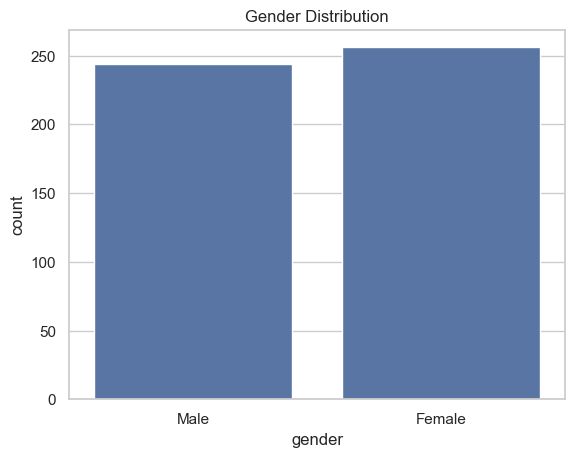

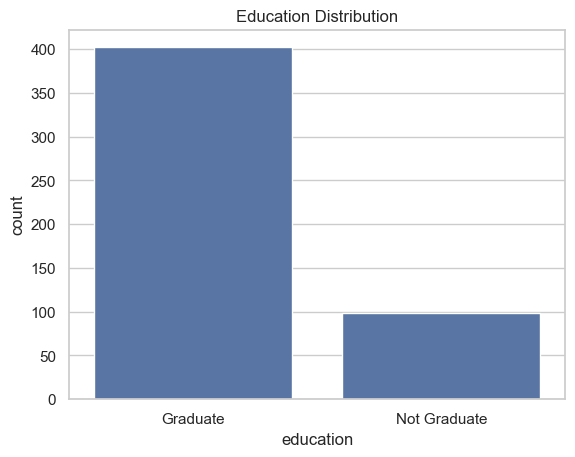

In [22]:
# Categorical Columns: Countplot
# Gender count
plt.figure()
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.savefig('../output/gender_distribution.png', bbox_inches='tight')
plt.show()
plt.close()

# Education count
plt.figure()
sns.countplot(data=df, x='education')
plt.title("Education Distribution")
plt.savefig('../output/education_distribution.png', bbox_inches='tight')
plt.show()
plt.close()

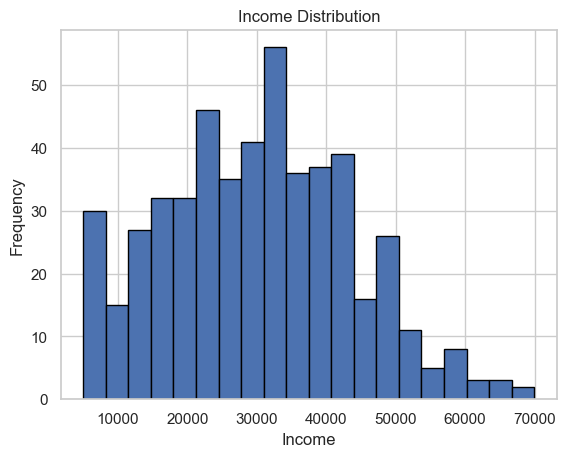

In [24]:
# Numerical Columns: Histogram
plt.figure()
df['income'].plot(kind='hist', bins=20, title="Income Distribution", edgecolor='black')
plt.xlabel("Income")
plt.savefig('../output/income_distribution.png', bbox_inches='tight')
plt.show()
plt.close()


#### Bivariate Analysis:-

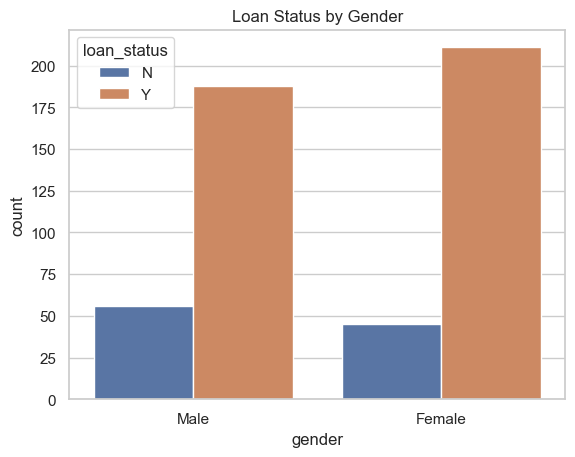

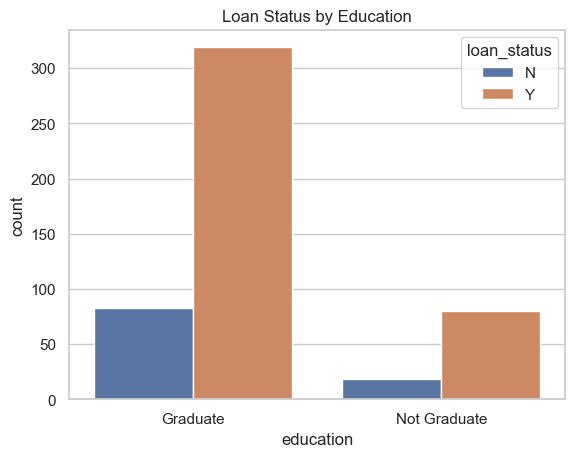

In [25]:
# Categorical vs Target
# Gender vs loan status
plt.figure()
sns.countplot(data=df, x='gender', hue='loan_status')
plt.title("Loan Status by Gender")
plt.savefig('../output/loan_status_by_gender.png', bbox_inches='tight')
plt.show()
plt.close()

# Education vs loan status
plt.figure()
sns.countplot(data=df, x='education', hue='loan_status')
plt.title("Loan Status by Education")
plt.savefig('../output/loan_status_by_education.png', bbox_inches='tight')
plt.show()
plt.close()


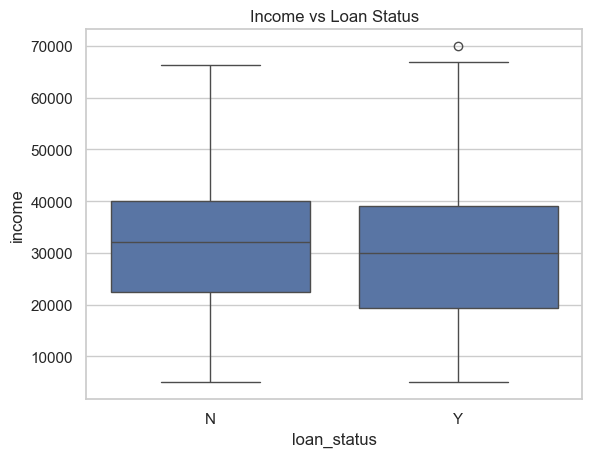

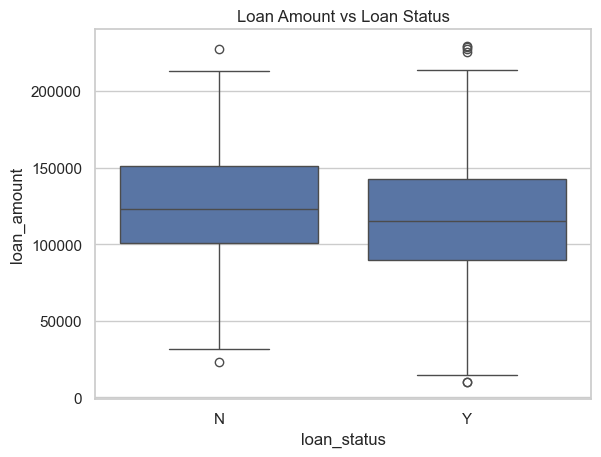

In [26]:
# Numerical vs Target
# Income vs loan status
plt.figure()
sns.boxplot(x='loan_status', y='income', data=df)
plt.title("Income vs Loan Status")
plt.savefig('../output/income_vs_loan_status.png', bbox_inches='tight')
plt.show()
plt.close()

# Loan Amount vs loan status
plt.figure()
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.savefig('../output/loan_amount_vs_loan_status.png', bbox_inches='tight')
plt.show()
plt.close()


In [27]:
# Crosstab for Categorical 
pd.crosstab(df['education'], df['loan_status'], normalize='index')* 100

loan_status,N,Y
education,,
Graduate,20.646766,79.353234
Not Graduate,18.367347,81.632653


#### Correlation Analysis:-

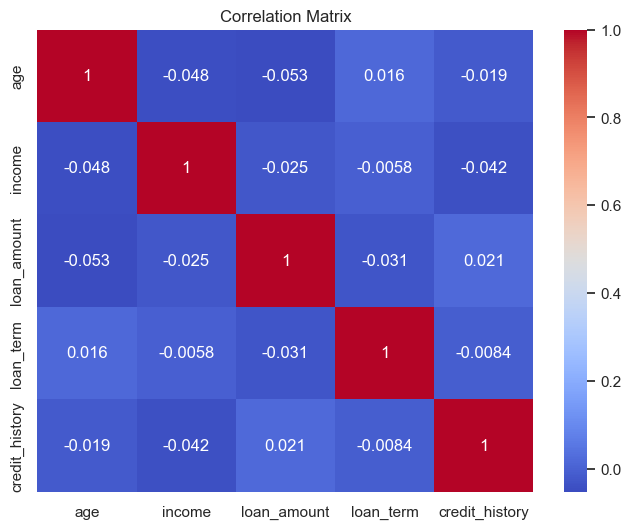

In [34]:
# Correlation heatmap

new_df = df.select_dtypes(include='number')  # Select only numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("../output/correlation_heatmap.png", bbox_inches='tight')
plt.show()
plt.close()

### Hypothesis Testing:-

#### 7.1 Chi-Square Test: Education vs Loan Status

##### 🎯 Objective:
To determine whether there is any statistical association between the applicant's education level and loan approval status.

- Null Hypothesis (H₀): Education and loan status are **independent** (no effect).
- Alternate Hypothesis (H₁): Education and loan status are **dependent** (some relationship exists).

In [ ]:
from scipy.stats import chi2_contingency

In [39]:
# Crosstab (frequency table)
table = pd.crosstab(df['education'], df['loan_status'])

# Chi-Square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)

# Print results
print("Chi-Square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print(table)
print("Expected Frequency Table:")
print(expected)

Chi-Square: 0.13224328165240823
p-value: 0.7161173729629654
Degrees of Freedom: 1
loan_status    N    Y
education            
Graduate      83  319
Not Graduate  18   80
Expected Frequency Table:
[[ 81.204 320.796]
 [ 19.796  78.204]]


##### 📊 Result:
- Chi-Square Statistic = 0.1322
- p-value = 0.7161

Since p-value > 0.05, we **fail to reject** the null hypothesis.

✅ **Conclusion:** Education level and loan approval **are not significantly related** in this dataset.


### 7.2 T-Test: Income vs Loan Status

#### 🎯 Objective:
To determine whether there is a significant difference in average income between people whose loans were approved and those whose loans were rejected.

- Null Hypothesis (H₀): The average income is **equal** for both approved and rejected groups.
- Alternate Hypothesis (H₁): The average income is **different** between the two groups.


In [ ]:
from scipy.stats import ttest_ind

# Split income column by loan status
approved_income = df[df['loan_status'] == 'Y']['income']
rejected_income = df[df['loan_status'] == 'N']['income']

# Perform Welch's t-test
t_stat, p_val = ttest_ind(approved_income, rejected_income, equal_var = False)


print('T-statistic:', t_stat)
print('P-value:', p_val)

T-statistic: -0.9942176490598827
P-value: 0.3215799446888587


##### 📊 Result:
- T-statistic = -0.99
- p-value = 0.3215

Since p-value > 0.05, we **fail to reject** the null hypothesis.

✅ **Conclusion:** Income does **not have a significant effect** on loan approval status.


### 7.3 T-Test: Loan Amount vs Loan Status

#### 🎯 Objective:
To test whether the average loan amount differs between people who got loan approval and those who didn’t.

- Null Hypothesis (H₀): The mean loan amount is **equal** for approved and rejected loans.
- Alternate Hypothesis (H₁): The mean loan amount is **different** between the two groups.


In [40]:
# Split loan_amount by loan status
approved_loan = df[df['loan_status'] == 'Y']['loan_amount']
rejected_loan = df[df['loan_status'] == 'N']['loan_amount']

# Perform Welch’s t-test
t_stat, p_val = ttest_ind(approved_loan, rejected_loan, equal_var=False)

# Output
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -1.6979272818116977
P-value: 0.0915416658762504


##### 📊 Result:
- T-statistic = -1.70
- p-value = 0.0915

Since p-value > 0.05, we **fail to reject** the null hypothesis at the 95% confidence level.

✅ **Conclusion:** There is **no strong statistical evidence** that loan amount affects loan approval,  
but it may have a **mild influence** (at 90% confidence).


### 7.4 ANOVA Test: Education vs Income

#### 🎯 Objective:
To test whether income levels are significantly different between education groups (Graduate vs Not Graduate).

- Null Hypothesis (H₀): Mean income is the same across education groups
- Alternate Hypothesis (H₁): At least one education group's income mean is different


In [41]:
from scipy.stats import f_oneway

# Group incomes by education
graduate_income = df[df['education'] == 'Graduate']['income']
not_graduate_income = df[df['education'] == 'Not Graduate']['income']

# Perform One-Way ANOVA
f_stat, p_val = f_oneway(graduate_income, not_graduate_income)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 0.17281981633446086
P-value: 0.6777968821130484


##### 📊 Result:
- F-statistic = 0.1728
- p-value = 0.6778

Since p-value > 0.05, we **fail to reject** the null hypothesis.

✅ **Conclusion:** There is **no significant difference** in average income between Graduate and Not Graduate groups.
